This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** July 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the testing script for solving using a CutFEM scheme the FREE-boundary plasma boundary problem with ITER tokamak geometry. In this case, the different external magnets are defined as SHAPED COILS (see class in Magnet.py). 

EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

# DEFINE EQUILIBRIUM PROBLEM PARAMETERS

In [ ]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.dim = 2                    # PROBLEM SPATIAL DIMENSION
Equilibrium.QuadratureOrder2D = 8      # ORDER OF SURFACE NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.QuadratureOrder1D = 4      # ORDER OF LENGTH NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0              # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.tol_saddle = 0.1           # TOLERANCE FOR DISTANCE BETWEEN CONSECUTIVE ITERATION SADDLE POINTS (LETS PLASMA REGION CHANGE)
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False           # PSI SOLUTION AITKEN RELAXATION SWITCH
Equilibrium.lambda0 = 0.3              # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False           # PHI LEVEL-SET AITKEN RELAXATION SWITCH
Equilibrium.alphaPHI = 0.5             # PHI LEVEL-SET AITKEN RELAXATION INITIAL PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


# SELECT COMPUTATIONAL MESH

In [ ]:
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE-REC'
#MESH = 'TRI03-MEDIUM-REC'
#MESH = 'TRI03-INTERMEDIATE-REC'
#MESH = 'TRI03-FINE-REC'
#MESH = 'TRI03-SUPERFINE-REC'
#MESH = 'TRI03-MEGAFINE-REC'
#MESH = 'TRI03-ULTRAFINE-REC'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-COARSE-REC'
#MESH = 'TRI06-MEDIUM-REC'
#MESH = 'TRI06-INTERMEDIATE-REC'
#MESH = 'TRI06-FINE-REC'
MESH = 'TRI06-SUPERFINE-REC'
#MESH = 'TRI06-MEGAFINE-REC'
#MESH = 'TRI06-ULTRAFINE-REC'

Equilibrium.MESH = Mesh(MESH)

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI06-SUPERFINE-REC
READ MESH FILES...Done!


# DEFINE TOKAMAK'S EXTERNAL MAGNETS AND FIRST WALL MESH

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-FINE-ITFW
READ MESH FILES...Done!


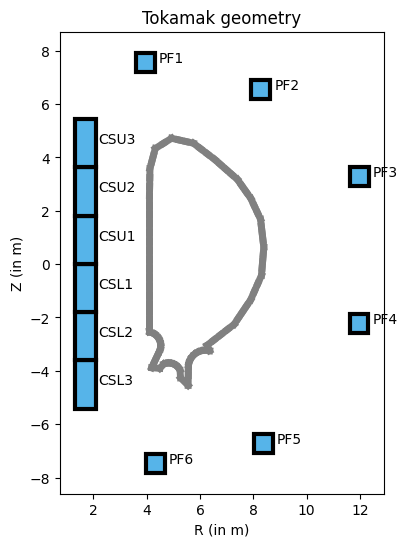

In [ ]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS WITH QUADRILATERAL COILS
# COILS
coil1 = QuadrilateralCoil(name = 'PF1',
                          Itotal = 5.73e6,
                          Xcenter = np.array([3.9431,7.5741]),
                          Area = 0.25)
coil2 = QuadrilateralCoil(name = 'PF2',
                          Itotal= -2.88e6,
                          Xcenter = np.array([8.2851,6.5398]),
                          Area = 0.25)
coil3 = QuadrilateralCoil(name = 'PF3',
                          Itotal= -5.81e6,
                          Xcenter = np.array([11.9919,3.2752]),
                          Area = 0.25)
coil4 = QuadrilateralCoil(name = 'PF4',
                          Itotal= -4.78e6,
                          Xcenter = np.array([11.9630,-2.2336]),
                          Area = 0.25)
coil5 = QuadrilateralCoil(name = 'PF5',
                          Itotal= -7.81e6,
                          Xcenter = np.array([ 8.3908,-6.7269]),
                          Area = 0.25)
coil6 = QuadrilateralCoil(name = 'PF6',
                          Itotal= 16.94e6,
                          Xcenter = np.array([4.3340, -7.4665]),
                          Area = 0.25)
   
# QUADRILATERAL CROSS-SECTION SOLENOIDS
solewidth = 0.6
solenoid1 = QuadrilateralCoil(name = 'CSL3',
                              Itotal = 5.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -3.6067],
                                                    [1.696-solewidth/2, -3.6067]]))
solenoid2 = QuadrilateralCoil(name = 'CSL2',
                              Itotal = -10.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -1.7983],
                                                    [1.696-solewidth/2, -1.7983]]))
solenoid3 = QuadrilateralCoil(name = 'CSL1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, -1.798],
                                                    [1.696+solewidth/2, -1.798],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696-solewidth/2, 0.0]]))
solenoid4 = QuadrilateralCoil(name = 'CSU1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696-solewidth/2, 1.8183]]))
solenoid5 = QuadrilateralCoil(name = 'CSU2',
                              Itotal = -4.05e6,
                              Xvertices = np.array([[1.696-solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696-solewidth/2, 3.6267]]))
solenoid6 = QuadrilateralCoil(name = 'CSU3',
                              Itotal = -4.82e6,
                              Xvertices = np.array([[1.696-solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 5.435],
                                                    [1.696-solewidth/2, 5.435]]))


magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

# TOKAMAK WALL MESH
TOKmesh = Mesh('TRI03-FINE-ITFW')
Equilibrium.TOKAMAK = Tokamak(WALL_MESH = TOKmesh,
                              MAGNETS = magnets)

Equilibrium.TOKAMAK.Plot()

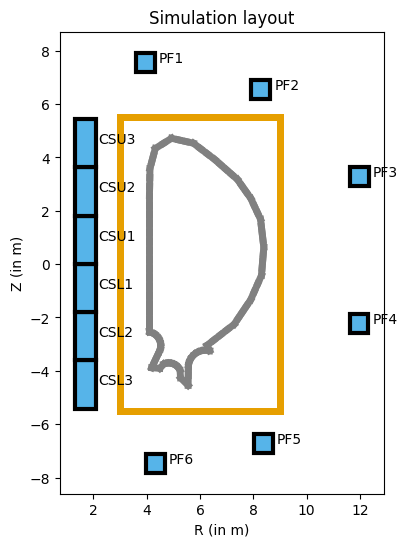

In [5]:
Equilibrium.PlotLayout(plotmesh=False)

# DEFINE INITIAL PLASMA BOUNDARY

PLASMA BOUNDARY PARAMETRISED USING CUBIC HAMILTONIAN 0-LEVEL CONTOUR

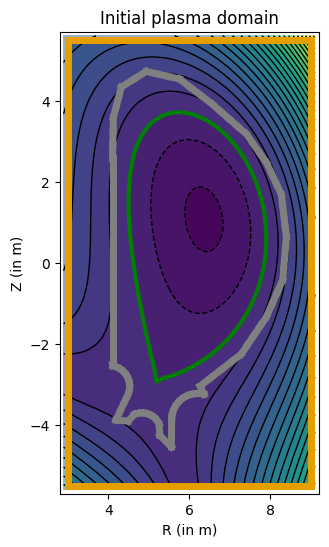

In [ ]:
import numpy as np

X_SADDLE = np.array([5.2, -2.9])       # ACTIVE SADDLE POINT   
X_RIGHT = np.array([7.9, 0.6])         # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])          # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])           # POINT ON TOP

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

Equilibrium.initialPHI.Plot()

# DISCRETISE DOMAIN

In [7]:
Equilibrium.DomainDiscretisation(INITIALISATION = True)()

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017818574514037656 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.20265348838508873 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·19.738125565344674
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 2884, subelem 0: surface integration quadrature is not accurate.
Done!
Done!


# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX

NORMALISED PARAMETRISED CUBIC HAMILTONIAN

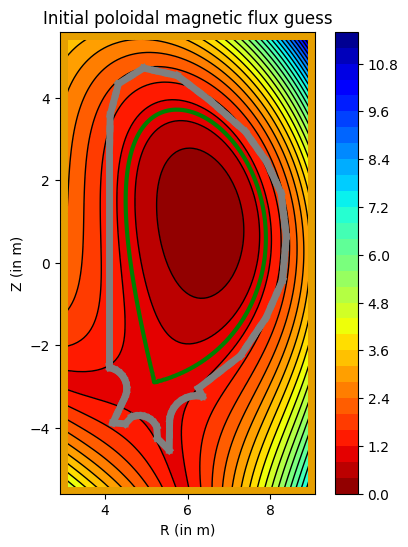

In [ ]:
X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

Equilibrium.initialPSI.Plot()

# INTIALISE PSI ARRAYS

In [9]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
     -> ASSIGN INITIAL PLASMA BOUNDARY VALUES...Done!
Done!


# DEFINE PLASMA CURRENT MODEL

APEC PROFILES PLASMA CURRENT MODEL

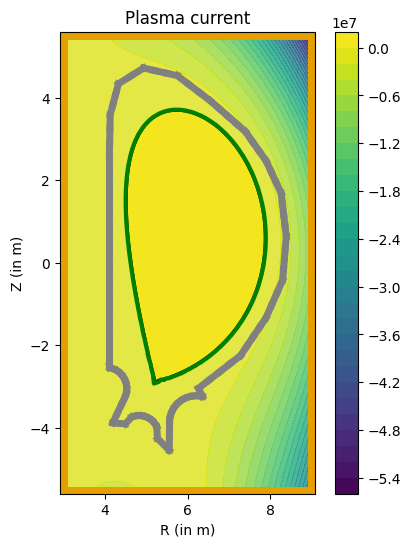

In [ ]:
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT

print('Total current integrated = ', Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi))
Equilibrium.PlasmaCurrent.Plot()

# RUN SIMULATION

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

Done!
     -> ASSIGN INITIAL VACUUM VESSEL BOUNDARY VALUES...Done!
Done!
WRITE INITIAL SIMULATION DATA...Done!


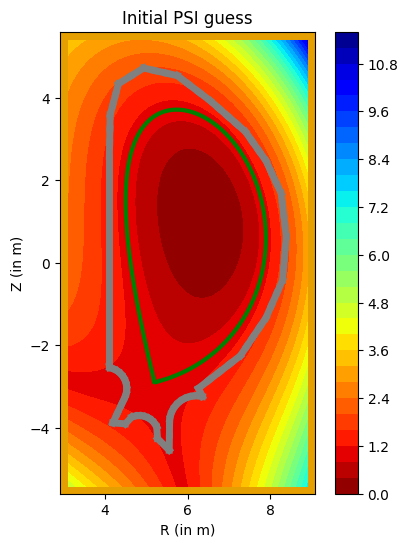

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999953
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.45107593 0.81077274]  (ELEMENT  876 ) WITH VALUE PSI_0 =  -11.24104341033529
SADDLE POINT AT  [ 5.086012   -3.31691652]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.3446613244907833


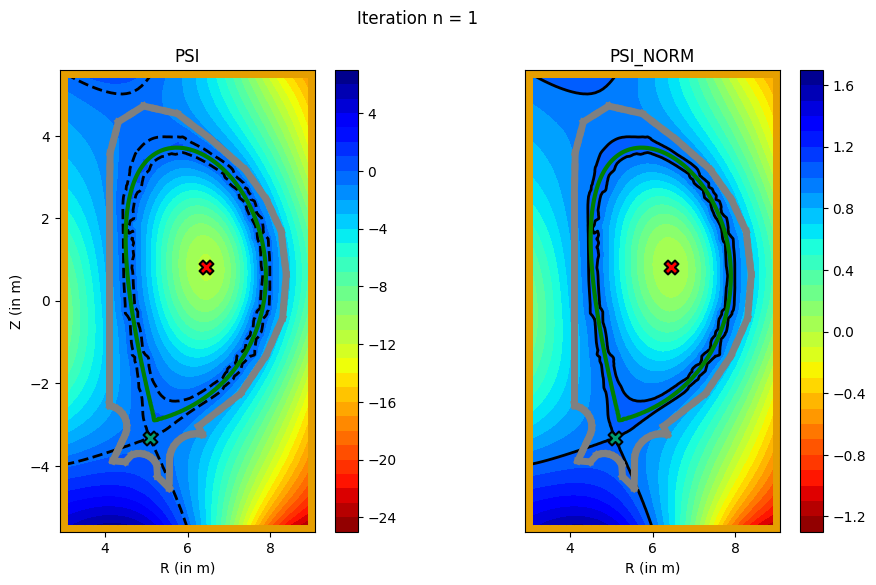

Internal iteration =  1 , PSI_NORM residu =  2.9498242914795463
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  14999999.999999983
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.4915502  0.72692812]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -14.431857221014779
SADDLE POINT AT  [ 5.06712413 -3.37513325]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.028391121237522084


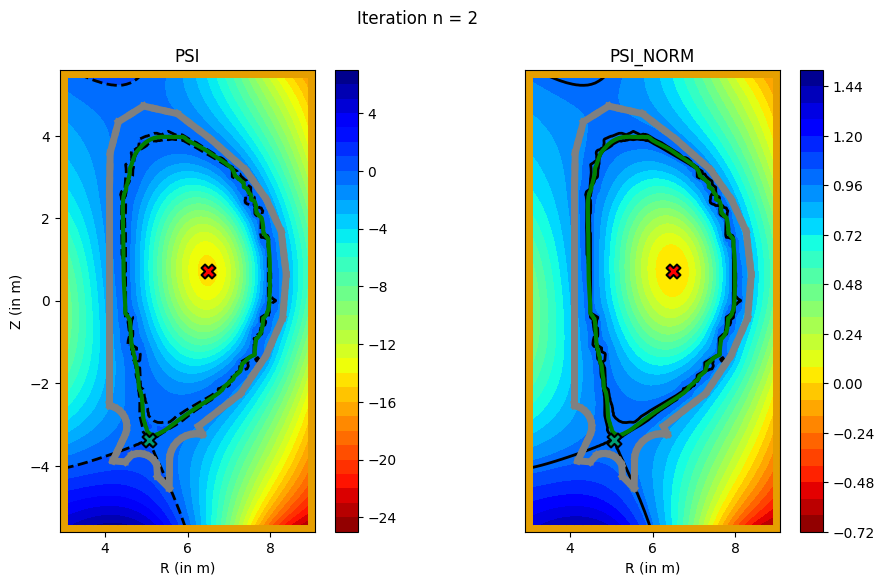

Internal iteration =  2 , PSI_NORM residu =  0.1647094617849498
 
Plasma region unchanged: distance between consecutive saddle points =  0.061204083506766475
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.000000143
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.51276941 0.68791422]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.26918107094472
SADDLE POINT AT  [ 5.06719883 -3.37495736]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.028376780825115133


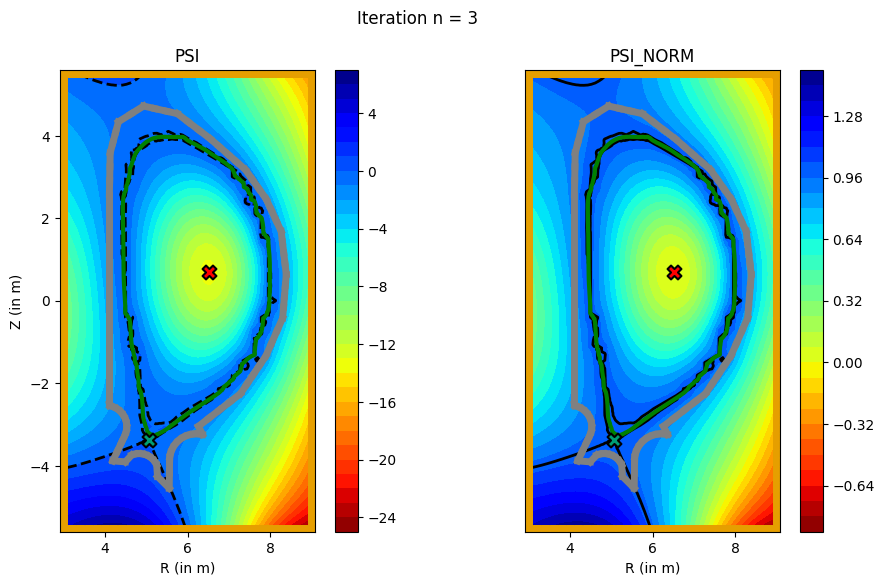

Internal iteration =  3 , PSI_NORM residu =  0.046276848717611466
 
Plasma region unchanged: distance between consecutive saddle points =  0.06101372459260839
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  15000000.000000073
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.5199436  0.66909832]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.152019830524459
SADDLE POINT AT  [ 5.06723904 -3.37492258]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.028373830045949067


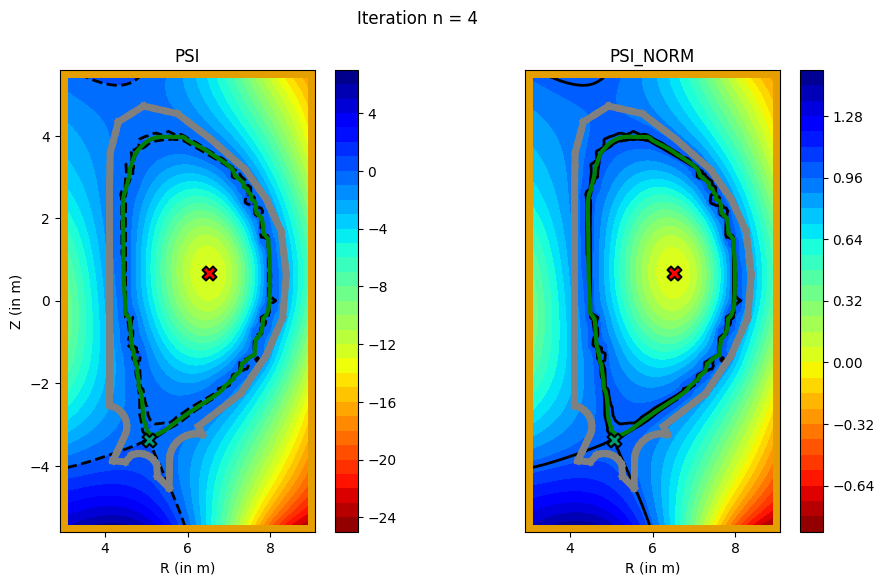

Internal iteration =  4 , PSI_NORM residu =  0.00575865276136602
 
Plasma region unchanged: distance between consecutive saddle points =  0.06096824351559396
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000054
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52207534 0.66000679]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.133163263252445
SADDLE POINT AT  [ 5.06725522 -3.37490846]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.028372147040529594


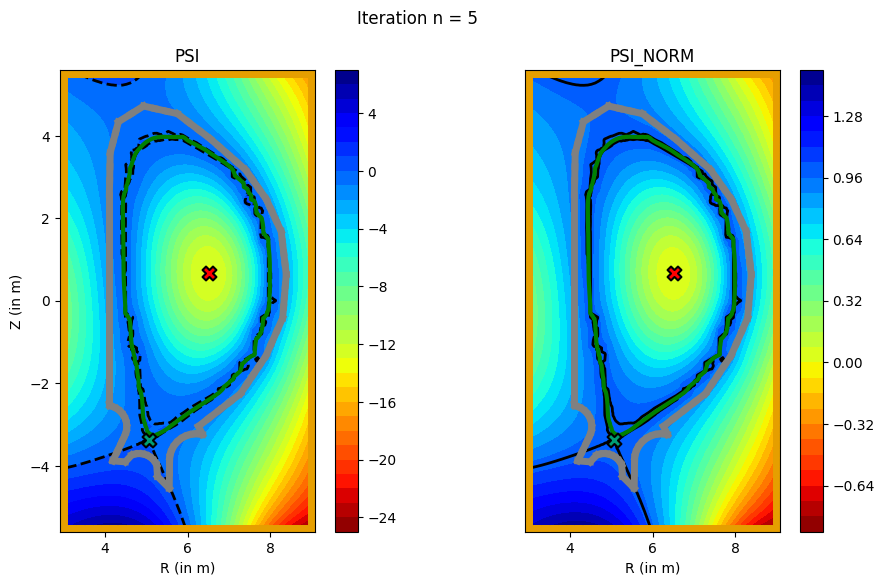

Internal iteration =  5 , PSI_NORM residu =  0.0014862493970934276
 
Plasma region unchanged: distance between consecutive saddle points =  0.060949834712532576
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.99999993
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52270948 0.65558903]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.129606119079089
SADDLE POINT AT  [ 5.06726263 -3.37490186]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.02837128645834906


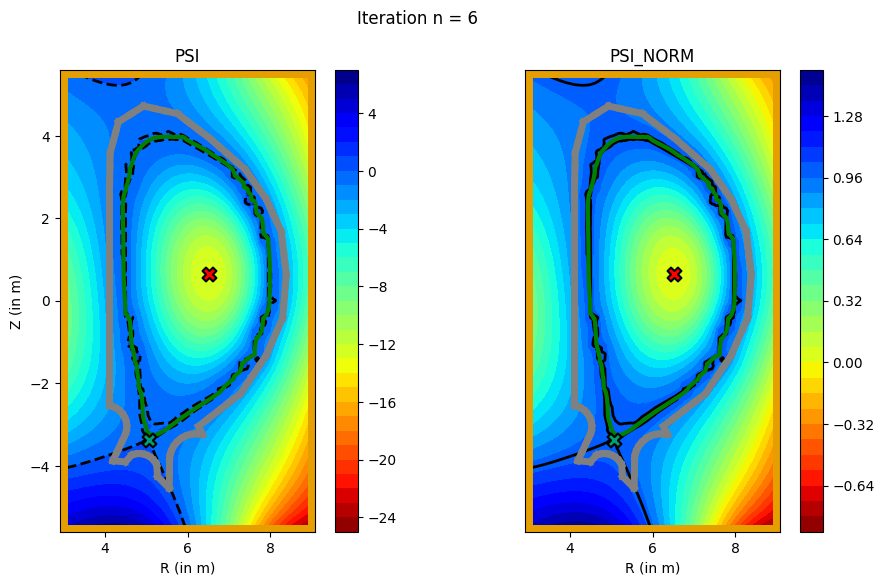

Internal iteration =  6 , PSI_NORM residu =  0.0006122261255426316
 
Plasma region unchanged: distance between consecutive saddle points =  0.06094127000432693
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  15000000.00000017
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52291017 0.65343227]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.128856190920057
SADDLE POINT AT  [ 5.06726619 -3.37489866]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.028370856484029768


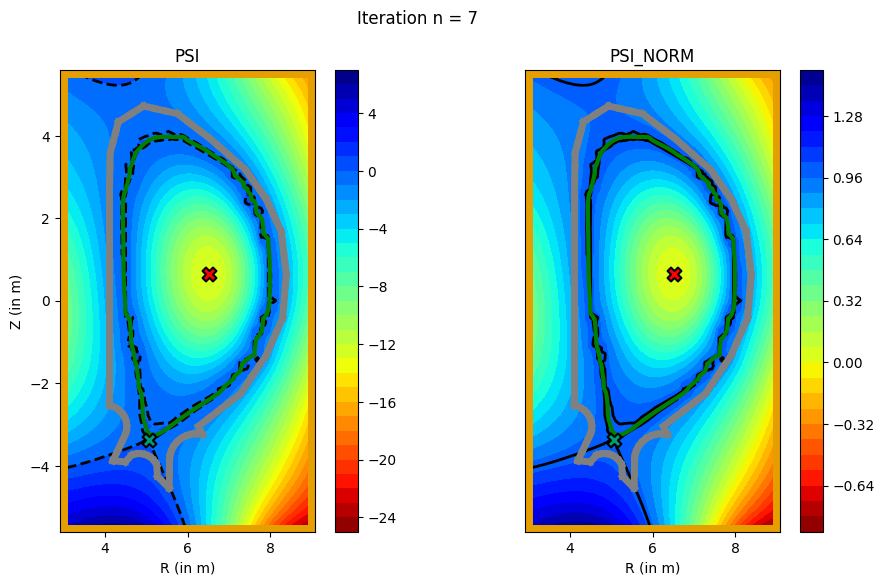

Internal iteration =  7 , PSI_NORM residu =  0.00028986262429330693
 
Plasma region unchanged: distance between consecutive saddle points =  0.060937130151762414
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  14999999.999999968
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52297915 0.6523775 ]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.12867654998616
SADDLE POINT AT  [ 5.06726792 -3.37489709]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.028370643308149687


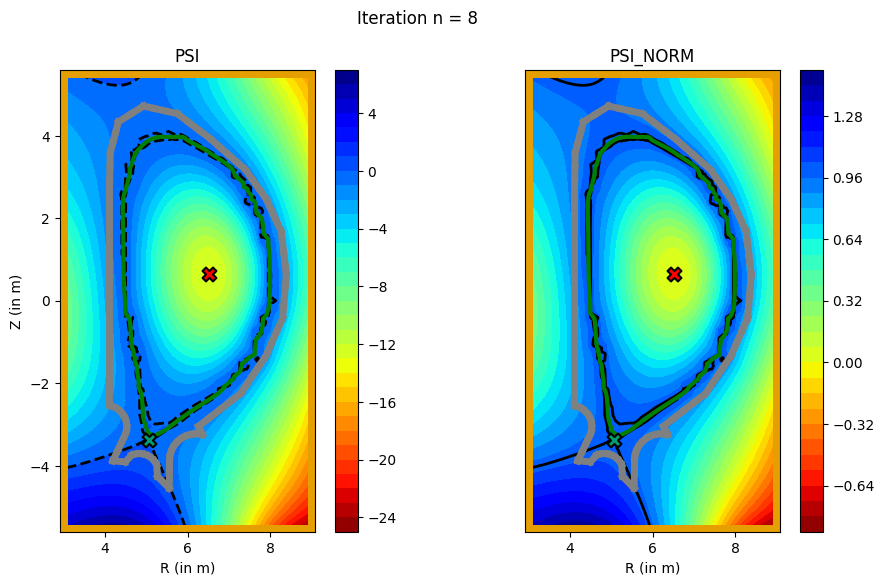

Internal iteration =  8 , PSI_NORM residu =  0.00014093117746677875
 
Plasma region unchanged: distance between consecutive saddle points =  0.06093510660206236
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.999999994
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52300511 0.65186133]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.12862474469547
SADDLE POINT AT  [ 5.06726877 -3.37489632]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.028370538074953378


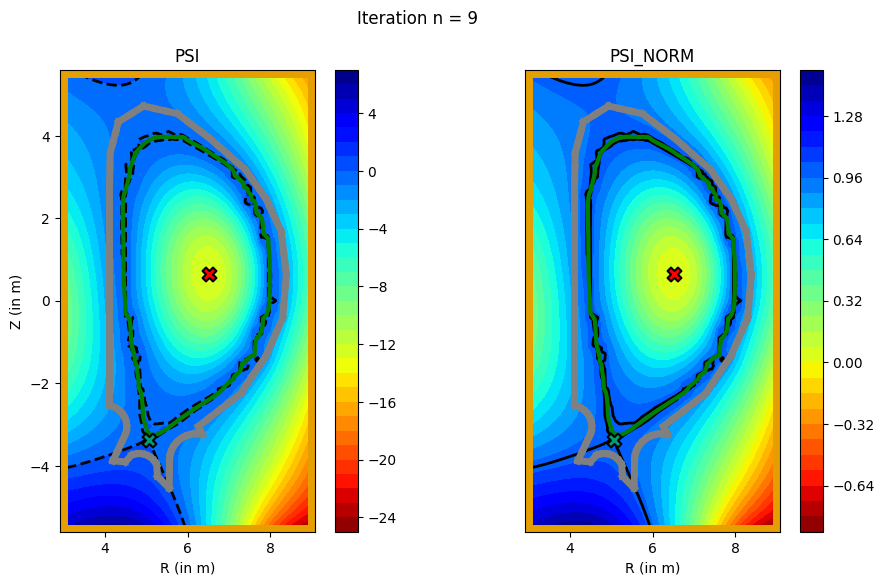

Internal iteration =  9 , PSI_NORM residu =  6.887555482438412e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.060934114364931694
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.043157949585963834
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  15000000.000000143
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52305119 0.65157297]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.128957597576793
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.086012   -3.31691652]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.028370538074953378


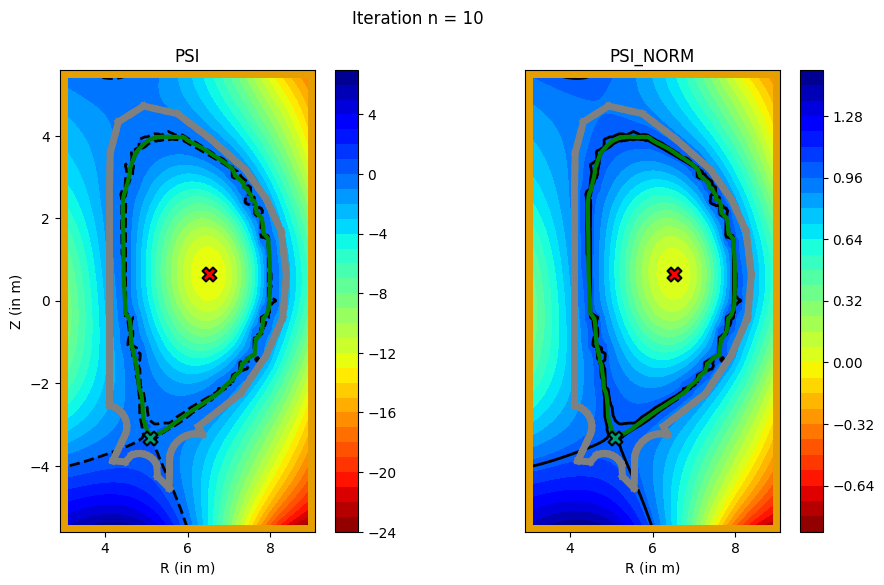

Internal iteration =  1 , PSI_NORM residu =  0.023601805579781476
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  14999999.999999901
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52307229 0.6514123 ]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.128727432408505
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.086012   -3.31691652]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.028370538074953378


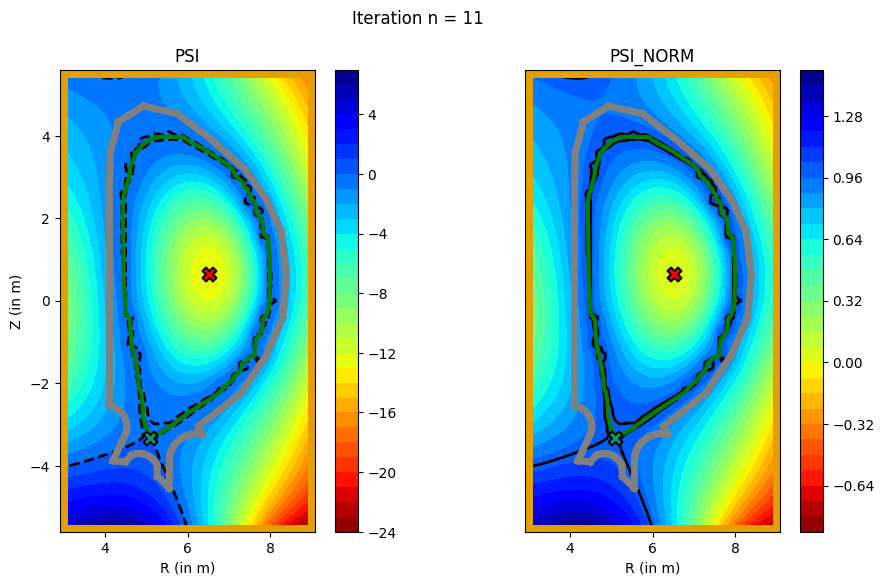

Internal iteration =  2 , PSI_NORM residu =  2.6058560224711473e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.0
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  6.959091010480398e-05
 
SOLUTION CONVERGED


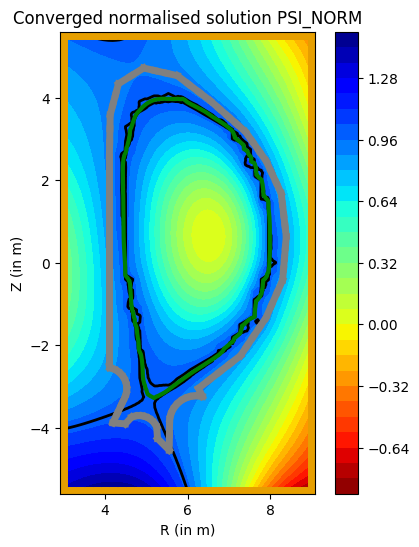

In [11]:
## NAME SIMULATION CASE 
CASE = "TS-FREE-APEC-ITER-SHAPEDCOILS"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)